In [ ]:
## https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

##Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #plotting module
from sklearn import metrics

##Importing Datasets from my drive

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1U46cv_0SDHdyjj1wLDfC6R2Z4eLFIzA7/view?usp=sharing'
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('audi.csv') 
 
df = pd.read_csv('audi.csv')
print(df)

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]


In [ ]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [ ]:
df.shape

(10668, 9)

##Getting some information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


##Checking the number of missing values

In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

##Checking the distribution of categorical data

In [ ]:
print(df.model.value_counts())
print(df.transmission.value_counts())
print(df.fuelType.value_counts())


 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64
Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64
Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64


##Plotting Bar Chart

###Visualizing Data

Car Model

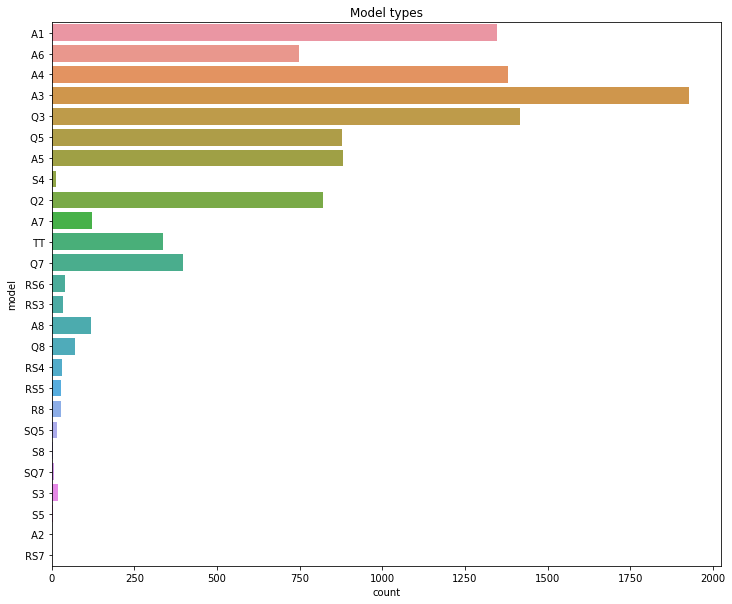

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(y='model', data=df)
plt.title('Model types')
plt.show()

Transmission Type

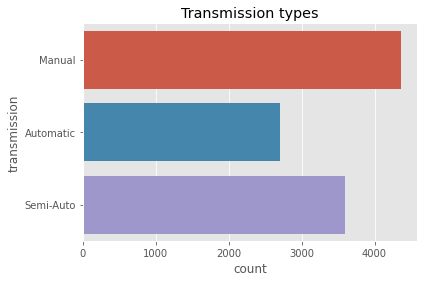

In [ ]:
sns.countplot(y='transmission', data=df)
plt.title('Transmission types')
plt.show()

In [ ]:
fuel_type = df['fuelType']
transmission_type = df['transmission']
car_model = df['model']
selling_price = df['price']

Fuel Type

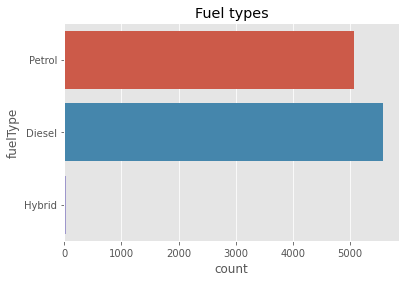

In [ ]:
sns.countplot(y='fuelType', data=df)
plt.title('Fuel types')
plt.show()

##Spliting X, Y values

In [ ]:
X = df.iloc[:,[0, 1, 3, 4, 5, 6, 7, 8]].values
Y = df.iloc[:,[2]].values ##Dependent variable PRICE

In [ ]:
X

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

###Plotting max values

In [ ]:
from matplotlib import style

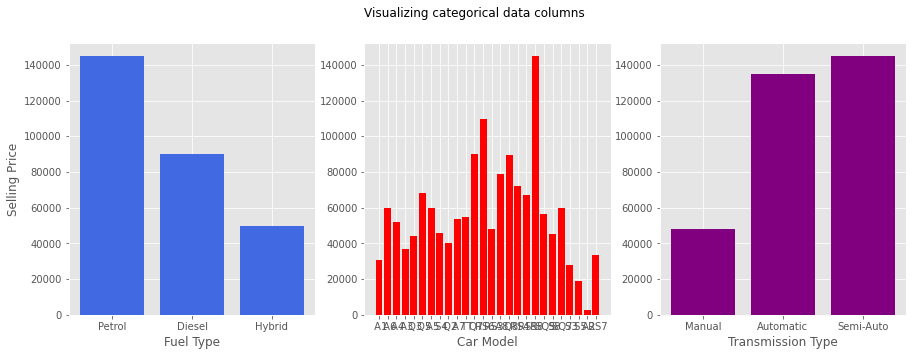

In [ ]:
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type, selling_price, color='royalblue')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.subplot(1,3,2)
plt.bar(car_model, selling_price, color='red')
plt.xlabel("Car Model")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission Type')
plt.show()

###Visualizing Mean values

```
# This is formatted as code
```



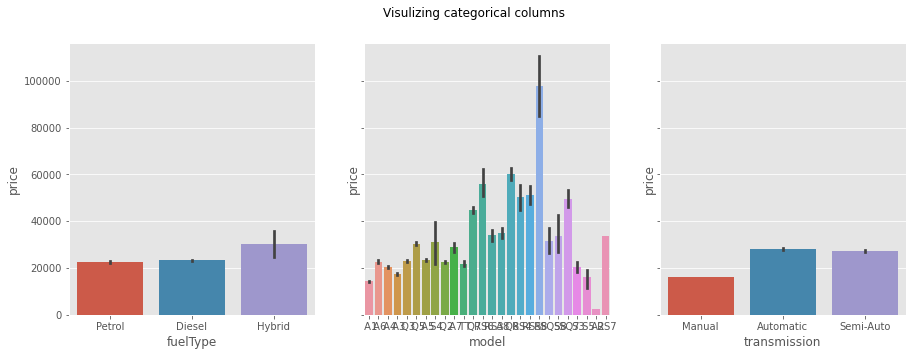

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle("Visulizing categorical columns")
sns.barplot(x=fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=car_model, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2]) 

###Statistical Details of categoical variables

In [ ]:
petrol_data = df.groupby('fuelType').get_group('Petrol')
petrol_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,5063.000000,5063.000000,5063.000000,5063.000000,5063.000000,5063.000000
mean,2017.378629,22480.908355,18863.487656,133.306340,46.397511,1.696544
std,2.098577,11075.268570,17284.374233,67.228098,9.983120,0.604917
min,1997.000000,1975.000000,7.000000,0.000000,18.900000,0.000000
25%,2016.000000,15700.000000,5165.000000,145.000000,39.800000,1.400000
50%,2018.000000,20798.000000,14882.000000,145.000000,44.800000,1.500000
75%,2019.000000,26990.000000,27329.000000,145.000000,54.300000,2.000000
max,2020.000000,145000.000000,139989.000000,580.000000,117.700000,6.300000


In [ ]:
petrol_data = df.groupby('transmission').get_group('Automatic')
petrol_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000,2708.000000
mean,2017.510340,28204.750000,21359.902880,149.411004,46.214660,2.187038
std,2.292977,13208.708494,24147.928607,64.110911,13.431408,0.694709
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,19299.000000,4521.000000,145.000000,38.200000,2.000000
50%,2019.000000,26500.000000,10000.000000,145.000000,44.800000,2.000000
75%,2019.000000,33500.000000,32413.250000,145.000000,51.400000,2.900000
max,2020.000000,135000.000000,136000.000000,580.000000,188.300000,6.300000


#Data Preprocessing

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])

In [ ]:
X

array([[0, 2017, 'Manual', ..., 150, 55.4, 1.4],
       [5, 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [0, 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [2, 2020, 'Manual', ..., 150, 49.6, 1.0],
       [9, 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [9, 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

##One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = ct.fit_transform(X)

In [ ]:
print(X)

[[0.0 1.0 0.0 ... 150 55.4 1.4]
 [1.0 0.0 0.0 ... 20 64.2 2.0]
 [0.0 1.0 0.0 ... 30 55.4 1.4]
 ...
 [0.0 1.0 0.0 ... 150 49.6 1.0]
 [1.0 0.0 0.0 ... 150 47.9 1.4]
 [0.0 1.0 0.0 ... 150 47.9 1.4]]


###Correlation

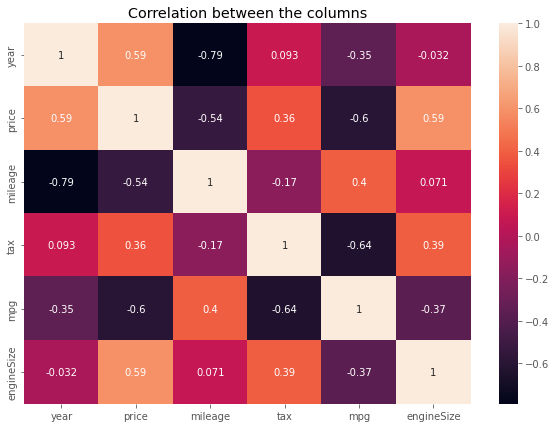

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [ ]:
print(X)

[[-0.58326752  1.2007284  -0.71233307 ...  0.35714729  0.35755001
  -0.88021837]
 [ 1.71447913 -0.83282781 -0.71233307 ... -1.57832278  1.03713001
   0.11492465]
 [-0.58326752  1.2007284  -0.71233307 ... -1.42944047  0.35755001
  -0.88021837]
 ...
 [-0.58326752  1.2007284  -0.71233307 ...  0.35714729 -0.09035499
  -1.54364705]
 [ 1.71447913 -0.83282781 -0.71233307 ...  0.35714729 -0.22163749
  -0.88021837]
 [-0.58326752  1.2007284  -0.71233307 ...  0.35714729 -0.22163749
  -0.88021837]]


#Splitting Dataset into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=0)

#Training Model

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(random_state=0)
regression.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=0)

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
print(y_pred)

[14337.15 23450.35 27330.07 ... 46275.18 31359.    9929.62]


In [ ]:
print(Y_test)

[[14998]
 [21950]
 [28990]
 ...
 [45995]
 [30500]
 [ 8400]]


#Testing result Random Forest

##Prediciton on test data

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[14337.15 14998.  ]
 [23450.35 21950.  ]
 [27330.07 28990.  ]
 ...
 [46275.18 45995.  ]
 [31359.   30500.  ]
 [ 9929.62  8400.  ]]


###R squared Error

In [ ]:
from sklearn.metrics import r2_score
error_score = metrics.r2_score(Y_test, y_pred)
print('R squared Error for Random Forest test data: ', error_score)

R squared Error for Random Forest test data:  0.9536134841307546


###Visualize the actual prices and Predicted prices

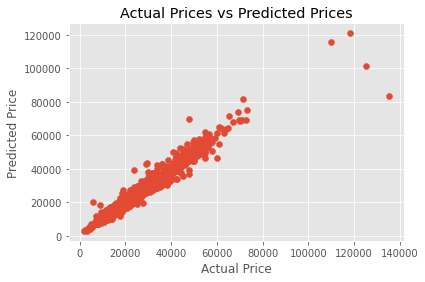

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

###Making Dataframe

In [ ]:
mydata = np.concatenate((y_pred.reshape(len(y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1)
mydata

array([[14337.15, 14998.  ],
       [23450.35, 21950.  ],
       [27330.07, 28990.  ],
       ...,
       [46275.18, 45995.  ],
       [31359.  , 30500.  ],
       [ 9929.62,  8400.  ]])

In [ ]:
dataframe = pd.DataFrame(mydata, columns=['Predicted Value', 'Real V'])

##Prediction on Training Data

In [ ]:
training_data_prediction_RF = regression.predict(X_train)  ##y pred

###R squared error

In [ ]:
error_score_RF = metrics.r2_score(Y_train, training_data_prediction_RF)
print('R squared Error for Random Forest training data: ', error_score_RF)

R squared Error for Random Forest training data:  0.9934793784001755


###Visualize the actual prices and Predicted prices

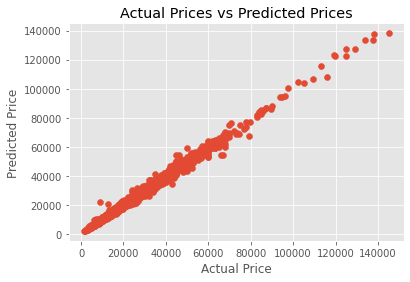

In [ ]:
plt.scatter(Y_train, training_data_prediction_RF)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Testing Result Linear Regression

##Training Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

##Prediction on training data

In [ ]:
training_data_prediction_LR = lin_reg_model.predict(X_train)

###R squared Error

In [ ]:
error_score_LR = metrics.r2_score(Y_train, training_data_prediction_LR)
print('R squared Error for Linear Regression training data: ', error_score_LR)

R squared Error for Linear Regression training data:  0.7904620338495609


###Visualize the actual prices and Predicted prices

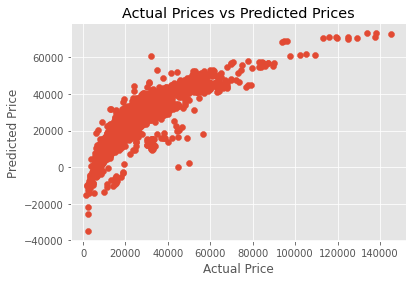

In [ ]:
plt.scatter(Y_train, training_data_prediction_LR)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

##Prediction on Test Data

In [ ]:
test_data_prediction_LR2 = lin_reg_model.predict(X_test)

###R squared error

In [ ]:
error_score_LR2 = metrics.r2_score(Y_test, test_data_prediction_LR2)
print("R squared Error for Linear Regression Test data: ", error_score_LR2)

R squared Error for Linear Regression Test data:  0.7916173577064793


###Plotting the Test predicted data

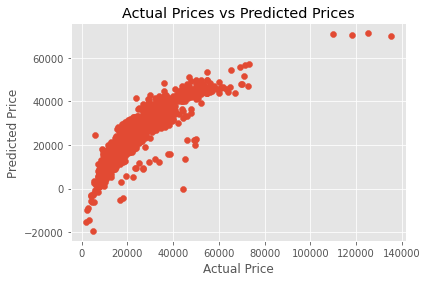

In [ ]:
plt.scatter(Y_test, test_data_prediction_LR2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Testing Result Lasso Regression

##Training Lasso

In [ ]:
from sklearn.linear_model import Lasso
lass_reg_model = Lasso()
lass_reg_model.fit(X_train, Y_train)

Lasso()

##Prediction on Training Data

In [ ]:
training_data_prediction_Lass = lass_reg_model.predict(X_train)

###R squared Error

In [ ]:
error_score_Lass = metrics.r2_score(Y_train, training_data_prediction_Lass)
print('R squared Error for Lasso training data: ', error_score_Lass)

R squared Error for Lasso training data:  0.7904881601971587


###Visualize the actual prices and Predicted prices

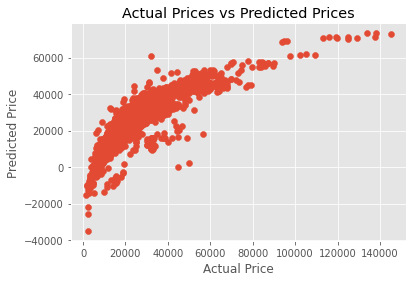

In [ ]:
plt.scatter(Y_train, training_data_prediction_Lass)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

##Prediction on Test Data

In [ ]:
test_data_prediction_Lass2 = lass_reg_model.predict(X_test)

###R squared Error

In [ ]:
error_score_Lass2 = metrics.r2_score(Y_test, test_data_prediction_Lass2)
print("R squared Error for Lasso Test data: ", error_score_Lass2)

R squared Error for Lasso Test data:  0.7916386038223415


###Plotting the Test predicted data

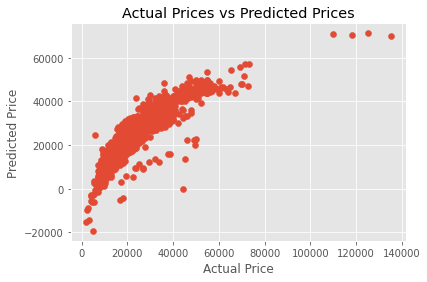

In [ ]:
plt.scatter(Y_test, test_data_prediction_Lass2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()